## Step 1
Imports and initialisation of a LJ calculator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ase
from ase.visualize import view
from ase.optimize import BFGS
from ase.calculators.lj import LennardJones

lj_calc = LennardJones(sigma=1.0, epsilon=1.0, rc=12.0)

## Step 2
Initialisation of the simulation box.
Parameters:
- 19 LJ atoms
- Side length = 12

### Box side length
12 Å seems to work with no issues, sufficiently large to house all of the atoms.

### Initial positions
When randomised across the entire box space, particles are so spaced out that instead of forming one 19-atom cluster, they form mini-clusters typically containing 2 - 6 atoms. ![test_minimisation](./images/test_min.png)


This is because the atoms are so far apart, the force between particles is negligible, and so they will rarely converge to form a single cluster. 

So instead of randomising the particles across the entire simulation box, I have restricted the random distribution to a theoretical box occupying the centre of the simuation box that is half the size.

In [2]:
def initialise_structure(n, box_length):
    '''
    n: int, number of atoms to place in the simulation box
    box_length: int/float, box side length in Å
    '''

    cell = np.eye(3)*box_length # 3x3 matrix with box_length across the diagonal
    atoms = ase.Atoms(pbc=True, cell = cell) #Atoms object which creates simulation box and contain all atoms
    for i in range(n):
        #pos = np.random.rand(3)*cell[1,1] ## randomising positions across the entire simulation box -- doesn't yield desired cluster as discussed in the above markdown cell
        pos = np.random.uniform(box_length*0.25, box_length*0.75, size = 3) # generates random coordinates restricted to the center of the simulation box 
        atoms.append(ase.Atom('He', position = pos)) #add atom to Atoms object

    return atoms

In [3]:
n = 19 # number of LJ atoms
box_length = 12 # box side length

lj_19 = initialise_structure(19, 12)
view(lj_19, viewer='x3d')

## Step 3

Test minimisation to determine parameters `fmax` and `steps` for an appropriate level of convergence.

Through various trials, the energy value (given to 6 decimal places here) doesn't fluctuate much (or at all) below `fmax = 0.001`, thus this seems a reasonable cutoff for a minima such that computation isn't "wasted".

`steps = 1024` seems more than sufficient for the test system. After repeated tests it seems that the system rarely requires above 500 steps to minimise. Indeed, one could limit steps to ~ 600-700, as those that require more than ~ 700 steps likely wont converge before 1024, though I have seen some cases where they do, so 1024 seems a reasonable buffer.

In [4]:
def minimise_structure(atoms, f_max=0.001, steps = 1024, id = "test"):
    '''
    atoms: Atoms object, contains structure for minimisation
    f_max: float, atomic force threshold below which structure is sufficiently minimised 
    steps: int, maximum number of minimisation steps before exiting minimisation
    '''

    atoms.calc = lj_calc #assigning LJ calculator to Atoms object
    dyn = BFGS(atoms=atoms, trajectory=f'./trajectories/{atoms.symbols}_{id}.traj') # set up BFGS minimiser for the Atoms object
    return dyn.run(fmax=f_max,steps=steps) # perform minimisation

minimise_structure(lj_19)

      Step     Time          Energy          fmax
BFGS:    0 05:19:44      317.799644     3199.629912
BFGS:    1 05:19:44       10.674231      188.724644
BFGS:    2 05:19:44        1.738129      166.013466
BFGS:    3 05:19:44       -7.787032        9.731600
BFGS:    4 05:19:44       -8.676982        4.259657
BFGS:    5 05:19:44       -7.556894       44.142366
BFGS:    6 05:19:44       -9.819923        3.333607
BFGS:    7 05:19:44      -10.095452        3.589073
BFGS:    8 05:19:44      -10.526333        3.630366
BFGS:    9 05:19:44       -9.927427       47.417139
BFGS:   10 05:19:44      -11.311981        3.768182
BFGS:   11 05:19:44      -12.181481        3.613233
BFGS:   12 05:19:44      -10.724476       51.627835
BFGS:   13 05:19:44      -13.311404       13.554032
BFGS:   14 05:19:44      -13.958283       10.981467
BFGS:   15 05:19:44      -12.882822       54.642849
BFGS:   16 05:19:44      -14.722878       26.759515
BFGS:   17 05:19:44      -15.031539        4.857555
BFGS:   18 05:

np.True_

In [5]:
view(lj_19, viewer='x3d')

## Step 4

Performing 100 minimisation cycles starting from a randomised inital structure each time.

In [6]:
n = 19 # number of LJ atoms
box_length = 12 # length of box side

energies = [] #array to store all of the minimised energies as they are generated
structures = [] #array to store all the final Atoms objects after minimisation

failed = [] # array to store the indecies of any failed minimisations 

'''
for 100 iterations, initialise a simulation box, conduct an energy minimisation,
then store the results in the `energies` and `structures` arrays. If fmax fails
to cross the threshold before reaching the maximum number of steps, append index
of the minimisation to the `failed` array for inspection.
'''
for i in range(100):

    lj_19 = initialise_structure(n = n, box_length = box_length)
    minimisation = minimise_structure(lj_19, id = i)

    energy = lj_19.get_potential_energy()
    energies.append(energy)
    structures.append(lj_19)

    if not minimisation:
        failed.append(i)

      Step     Time          Energy          fmax
BFGS:    0 05:19:44        8.431899      240.833053
BFGS:    1 05:19:44       -0.326597       96.805724
BFGS:    2 05:19:44       -5.376166        2.443722
BFGS:    3 05:19:44       -5.708398        2.402535
BFGS:    4 05:19:44       -4.317106       26.857624
BFGS:    5 05:19:44       -5.947543        2.126180
BFGS:    6 05:19:44       -6.100661        1.947343
BFGS:    7 05:19:44       -6.113841       29.063035
BFGS:    8 05:19:44       -7.073473        8.533460
BFGS:    9 05:19:44       -7.974455        8.119594
BFGS:   10 05:19:44       12.270301      366.286082
BFGS:   11 05:19:44       -8.467342        6.197701
BFGS:   12 05:19:44       -8.997947        6.053679
BFGS:   13 05:19:44       -8.830561       33.439683
BFGS:   14 05:19:44      -10.156321        3.444736
BFGS:   15 05:19:44       -9.780474       28.102965
BFGS:   16 05:19:44      -11.204524        3.611619
BFGS:   17 05:19:44       -9.810981       30.601899
BFGS:   18 05:

In [7]:
failed

[39, 98]

In [8]:
i = failed[0] #example of a failed minimisation
view(structures[i], viewer='x3d')

On this occasion two of the minimisations failed. I have observed some that do not minimise come close to `fmax`, e.g. `fmax = 0.00436` In light of those cases, it may be more appropriate to increase fmax slightly, to`fmax = 0.005` for example.

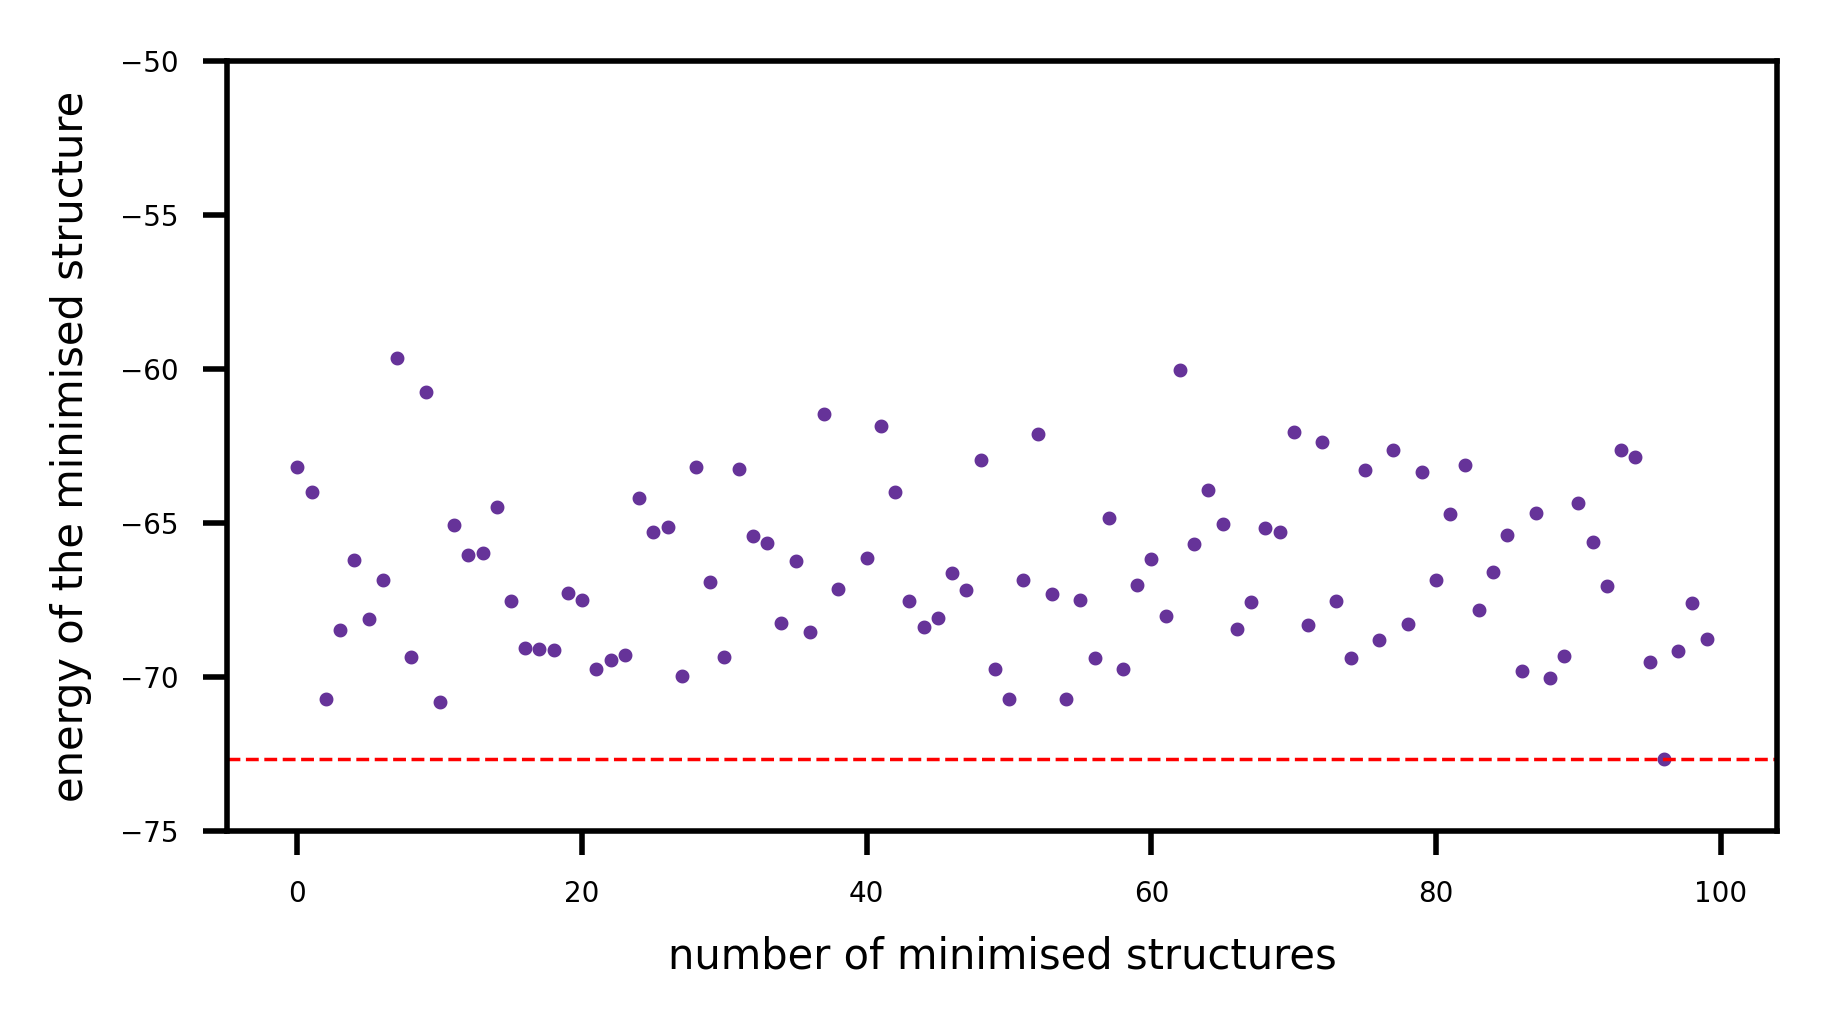

In [9]:
fig=plt.figure(num=None,figsize=(4,2),dpi=500,facecolor='w',edgecolor='k')
plt.tick_params(axis='both', which='major', labelsize=4)
plt.xlabel('number of minimised structures',fontsize=6)
plt.ylabel('energy of the minimised structure',fontsize=6)
plt.scatter(np.arange(len(energies)),energies,color='rebeccapurple',s=1)
plt.ylim(-75, -50)
plt.axhline(y = -72.659782, color = 'r', linestyle = '--', lw=0.5)
plt.savefig('LJ19_min_test.png')

In [10]:
def enumerate_minima(energies):
    '''
    some function, or indeed collection of functions that can identify the number of different minima we have explored.
    This would require some identification of the uniqueness of each of the simulations, particularly if their energy is very close.
    Extra work I'm not interested in at this moment in particular, maybe closer to the deadline if I have time.

    As a first approximation, I will use the energy values.
    '''

    energies = [round(e, 1) for e in energies]

    return len(set(energies))

enumerate_minima(energies)


58

### Analysis

Here, only one of these structures have reached the global minimum (red dashed line). Based on the equivalent energy approximation, we have found 58 unique minima (rounding energies to 1 decimal place).

## Step 5

Implementation of the basin hopping algorithm

In [11]:
def perturb_structure(atoms, method = 'wild', magnitude = 3.0, k = 3):
    '''
    Pertubation Methods
    '''
    def wild(atoms=atoms, magnitude=magnitude):
        '''
        'wild' randomly selects one atom and moves it in a random direction by a random distance. The distance
        is randomly distributed between 0.0 and the `magnitude` variable.
        '''
        atom_index = np.random.randint(len(atoms) - 1) #selects a random atom from the cluster

        rng = np.random.default_rng() #initialising random number generator
        direction = rng.normal(size = 3) #randomising the direction the selected atom will be moved
        direction /= np.linalg.norm(direction, keepdims = True) #normalising to produce a unit vector
        length = np.random.uniform(low = 0.0, high = magnitude) #random magnitude between 0 and the specified magnitude
        atoms.positions[atom_index] += direction * length # apply transformation of coordinates to the selected atom
        
        return atoms
    
    def stretch(atoms=atoms, magnitude = magnitude):
        '''
        'stretch' calculates the centroid of the cluster, then moves all the atoms away from that centroid.
        Each of the atoms is moved by a random distance, randomly distributed between 0.0 and the `magnitude` variable
        '''
        centroid = np.mean(atoms.positions, axis = 0) #determine the center of all the atoms
        vectors = atoms.positions - centroid # compute the vector that points from the centroid to each atom
        norms = np.linalg.norm(vectors, axis = 1) # compute the norms for the vectors
        mask = norms > 0.0 # mask so that we don't divide by 0, in case one of the atoms is exactly at the centroid
        unit_vectors = vectors[mask]/norms[mask, None] # normalise to produce unit vectors pointing away from the centroid for each atom

        # randomise the lengths of all the vectors, between 0 and the specified magnitude
        lengths = np.random.uniform(low = 0.0, high = magnitude, size = (unit_vectors.shape[0], 1)) 
        
        atoms.positions += unit_vectors * lengths # apply transformation to all the atom positions
        
        return atoms

    def sweep(atoms=atoms, magnitude=magnitude, k=3):
        '''
        'sweep' determines the k-furthest atoms from the cluster centroid, and moves each
        of these atoms in a random direction by a random distance, randomly distributed between
        0.0 and the `magnitude` variable. Based on the idea that the core of the cluster is likely
        stable, but the outermost atoms are those that need to be displaced.
        '''

        # Computing distance from centre of the cluster
        centroid = np.mean(atoms.positions, axis = 0)
        vectors = atoms.positions - centroid
        distances = np.linalg.norm(vectors, axis = 1)
        
        #identifying the k-furthest atoms from the centre of the cluster
        idx = np.argsort(distances)[-k:][::-1]

        rng = np.random.default_rng()
        directions = rng.normal(size = (len(idx), 3)) #randomising the directions each of the k-furthest atoms will be moved
        directions /= np.linalg.norm(directions, axis=1, keepdims = True) #normalising to produce the unit vector
        lengths = np.random.uniform(low = 0.0, high = magnitude, size = (directions.shape[0], 1)) #random magnitudes
        
        atoms.positions[idx] += directions * lengths
        return atoms
    
    def swap(atoms):
        '''
        'swap' exchanges two random atoms coordinates, but only one component. e.g. randomly swap the x coordinate
        of atom a with the z coordinate of atom b, or randomly swap the y coordinate of atom a with the y coordinate
        of atom b.
        '''
        rng = np.random.default_rng() # initialising random number generator
        n = len(atoms) # number of atoms

        # randomising the atoms selected
        atom_a = rng.integers(0, n)
        atom_b = rng.integers(0, n)

        # randomising the x, y, z coordinates to be swapped
        comp_a = rng.integers(0, 3)
        comp_b = rng.integers(0, 3)

        #simultaneously exchange the coords of atoms a and b
        atoms.positions[atom_a, comp_a], atoms.positions[atom_b, comp_b] = atoms.positions[atom_b, comp_b], atoms.positions[atom_a, comp_a]

        return atoms

    if method == 'wild':
        return wild(atoms, magnitude)
        
    elif method == 'stretch':
        return stretch(atoms, magnitude)

    elif method == 'sweep':
        return sweep(atoms, magnitude, k)
    
    elif method == 'swap':
        return swap(atoms)
    


In [12]:
n = 19 # number of LJ atoms
box_length = 12 # length of box side

energies = []
structures = []
failed = []
minima = [] #array to store only the minima that is lower in energy than any previously explored minima

global_min = float('inf') #initialising global minimum variable

for i in range(100):
    # for the first iteration, initialise a random structure
    if i == 0:
        lj_19 = initialise_structure(n = n, box_length = box_length) 
    
    # for subsequent iterations, perturb a copy of the minimum structure
    else:
        lj_19 = perturb_structure(minimum.copy(), method = 'stretch', magnitude = 0.5)

    minimisation = minimise_structure(lj_19, id = i)

    if not minimisation:
        failed.append(i)

    energy = lj_19.get_potential_energy()
    energies.append(energy)
    structures.append(lj_19)

    # minimum variable stores the structure with the lowest energy
    if energy < global_min:
        global_min = energy # replace global_min variable with new lowest energy
        minimum = lj_19.copy()
        minima.append(minimum) #append minimum structure to minima

    

      Step     Time          Energy          fmax
BFGS:    0 05:21:17     2923.269638    55333.389369
BFGS:    1 05:21:17      215.827238     2211.572297
BFGS:    2 05:21:17       -2.389530      116.712120
BFGS:    3 05:21:17       -9.653049       27.948238
BFGS:    4 05:21:17      -10.525228       21.417168
BFGS:    5 05:21:17      -10.784189       30.756420
BFGS:    6 05:21:17      -12.156143       13.283527
BFGS:    7 05:21:17      -13.060782        4.586468
BFGS:    8 05:21:17      -13.915724        4.443999
BFGS:    9 05:21:17       -7.997733      124.048859
BFGS:   10 05:21:17       -3.093212      173.198181
BFGS:   11 05:21:17       40.819254      632.406235
BFGS:   12 05:21:17       33.591217      294.313276
BFGS:   13 05:21:17       13.056870      400.303842
BFGS:   14 05:21:17        2.074447      239.816525
BFGS:   15 05:21:17      -10.911024       81.781382
BFGS:   16 05:21:17      -17.001085       28.054254
BFGS:   17 05:21:17      -18.794043        4.973846
BFGS:   18 05:

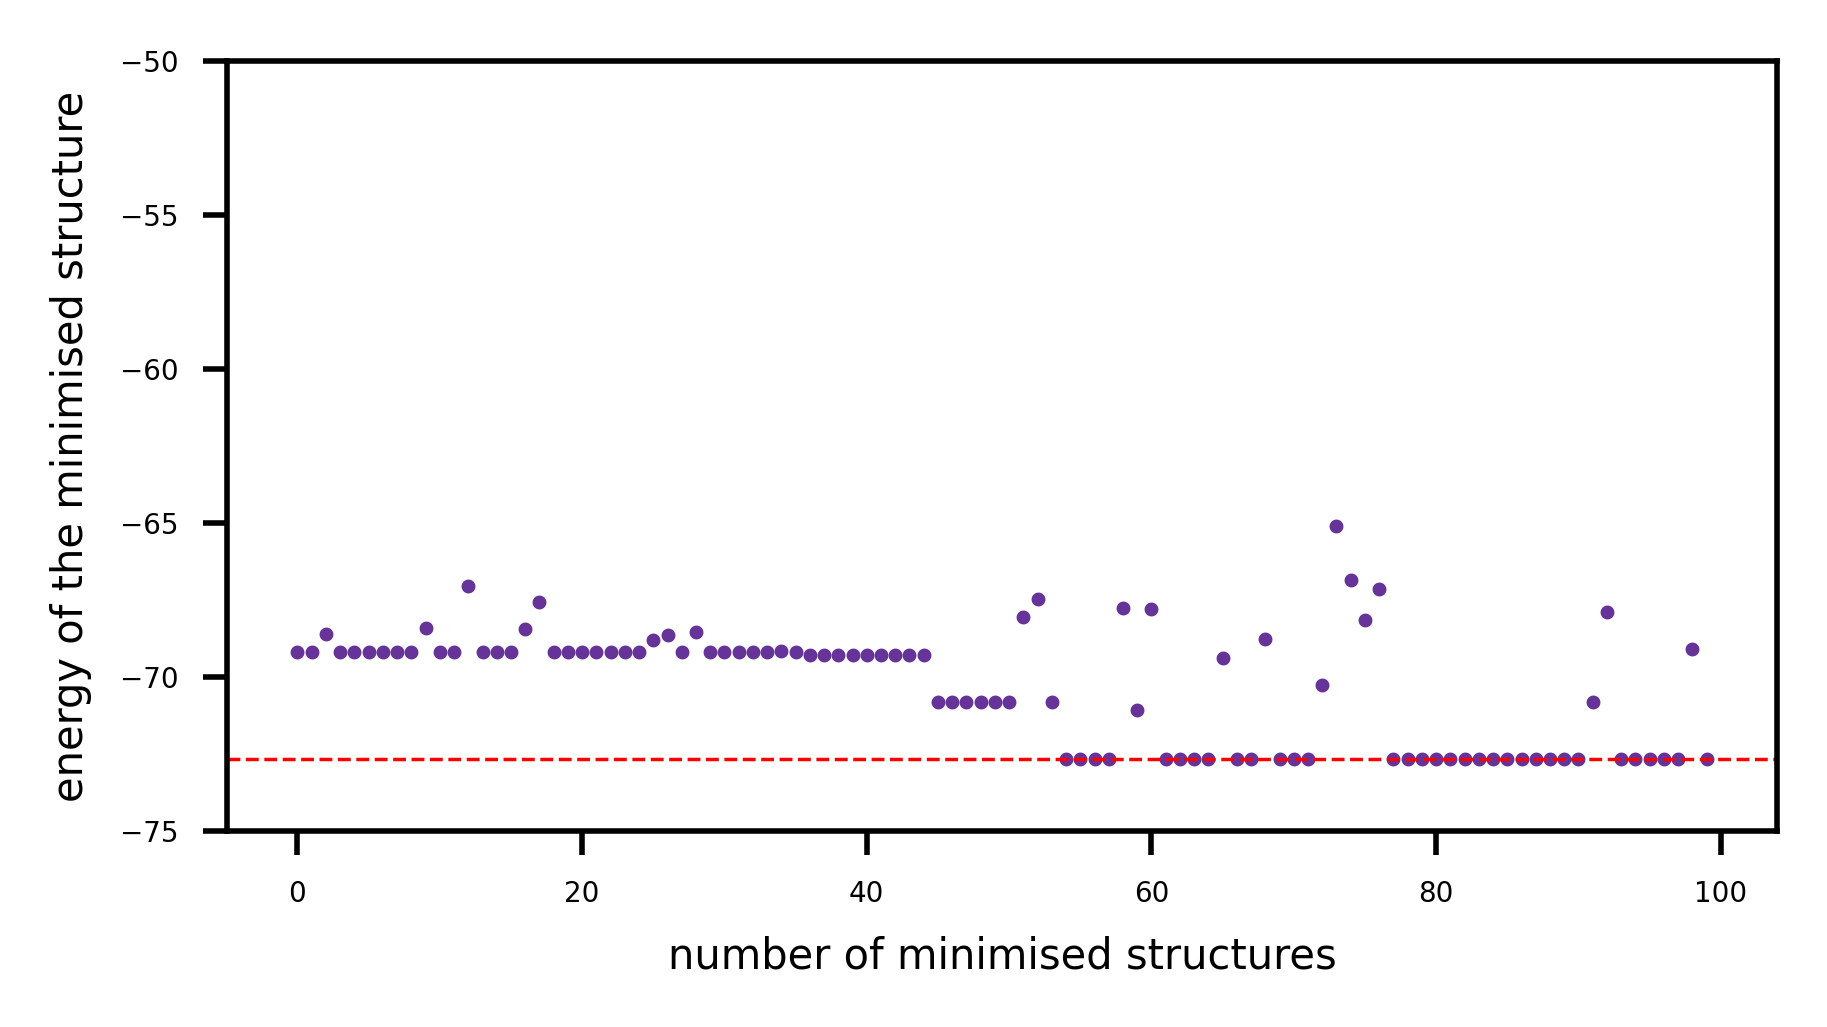

In [13]:
fig=plt.figure(num=None,figsize=(4,2),dpi=500,facecolor='w',edgecolor='k')
plt.tick_params(axis='both', which='major', labelsize=4)
plt.xlabel('number of minimised structures',fontsize=6)
plt.ylabel('energy of the minimised structure',fontsize=6)
plt.ylim(-75, -50)
plt.axhline(y = -72.659782, color = 'r', linestyle = '--', lw=0.5)
plt.scatter(np.arange(len(energies)),energies,color='rebeccapurple',s=1)
plt.savefig('./images/LJ19_min_demo.png')

In [14]:
view(minima[-1], viewer = 'x3d')

## Analysis of Pertubation Methods

Varied Magnitude of pertubation up from 1.0 up to 12.0 (to be ridiculous)[1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 12.0]

#### 'Wild'
- 'wild' randomly selects one atom and moves it in a random direction by a random distance. 
- The distance is randomly distributed between 0.0 and the `magnitude` variable.
- Tested magnitude = 1, 2, 3, 4, 5, 6, 8, 12
- **Best-performing: magnitude = 8 (minimum found in 38 iterations).**
- At low magnitude, pertubations were insignificant and would stay at the same energy for many iterations.
- However, at magnitude = 12, perturbation was too significant and the minima was never found


<img src="images/LJ19_min_wild_8.png" alt="wild" width="400">

#### 'Stretch'
- 'stretch' calculates the centroid of the cluster, then moves all the atoms away from that centroid.
- Each of the atoms is moved by a random distance, randomly distributed between 0.0 and the `magnitude` variable
- Tested magnitude = 0.5, 1, 2, 3, 4, 6, 8, 12
- **Best-performing: magnitude = 0.5 (minimum found in 9 iterations)**
- Generally increasing the magnitude perturbed the structure so much such that it would hop out of a lower energy basin into a higher energy basin.


<img src="images/LJ19_min_stretch_0-5.png" alt="stretch" width="400">

#### 'Sweep'
- 'sweep' determines the k-furthest atoms from the cluster centroid, and moves each of these atoms in a random direction by a random distance, randomly distributed between 0.0 and the `magnitude` variable.
- Based on the idea that the core of the cluster is likely stable, but the outermost atoms are those that need to be displaced.
- Tested magnitude = 1, 2, 3, 4, 5, 6, 8, 12
- **Best-performing: was magnitude = 6, minimising in 32 iterations.**
- Generally, low magnitude pertubations were too insignificant to escape basins of attraction, whilst, higher than mag = 6 resulted in poorer performance as perturbations consistently escaped to higher energy minima.
- In future could explore different numbers of atoms to perturb (k)

<img src="images/LJ19_min_sweep_6.png" alt="sweep" width="400">

#### 'Swap'
- 'swap' exchanges two random atoms coordinates, but only one component.
- e.g. randomly swap the x coordinate of atom a with the z coordinate of atom b, or randomly swap the y coordinate of atom a with the y coordinate of atom b.
- minimum found in 67 iterations

<img src="images/LJ19_min_swap.png" alt="swap" width="400">

### Conclusions
The best performing pertubation method in my test was 'Stretch', with magnitude = 0.5. Generally it was seen that as magnitude of pertubtation was increased, the structure was perturbed so much that it consistently would find a minimum in a higher energy basin of attraction.

However it is important to take the conclusions from these results with a pinch of salt, as the 'performance'  is heavily influenced by the very first minimised structure. For example, I noticed with this 'Stretch' method if the first structure minimises to -70 kj/mol, it is much more likely to find the global minimum in fewer iterations, compared to the first structure minimising to -60 kj/mol instead. A proper investigation should validate the performance by running multiple iterations of this test.
